In [1]:
from prefect import task, Flow
import pandas as pd
import numpy as np


@task
def get_dataABC() -> pd.DataFrame:
    data = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
    return data

@task
def get_weird_features() -> pd.DataFrame:
    data = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
    return data

@task
def get_dataXYZ() -> pd.DataFrame:
    data = pd.DataFrame(np.arange(3).reshape(3, 1), columns=['X'])
    return data


@task
def clean_data(table: pd.DataFrame) -> pd.DataFrame:
    table = table.applymap(lambda x: np.nan if x % 3 == 0 else x)
    return table


@task
def generate_features(
    table1: pd.DataFrame, table2: pd.DataFrame, table3: pd.DataFrame
) -> pd.DataFrame:
    features = pd.concat((table1, table2, table3), axis=1)
    return features


@task
def train_model_RED(features: pd.DataFrame) -> np.array:
    return pd.DataFrame([1, 3, 5, 7])


@task
def train_model_ROEY(features: pd.DataFrame) -> np.array:
    return pd.DataFrame([2, 4, 6, 8])


@task
def export_model(model: np.array, path: str) -> None:
    model.to_csv(path, index=False)


with Flow('sample_flow') as flow:
    data = get_dataABC()
    weird_data = get_weird_features()
    target_variable = get_dataXYZ()
    data = clean_data(data)
    weird_data = clean_data(weird_data)
    target_variable = clean_data(target_variable)
    features = generate_features(data, target_variable, weird_data)
    model1 = train_model_RED(features)
    model2 = train_model_ROEY(features)
    model3 = train_model_RED(weird_data)
    export_model(model1, 'model1.csv')
    export_model(model2, 'model2.csv')
    export_model(model3, 'model3.csv')

In [2]:
from prefect import task, Flow
import pandas as pd
import numpy as np


@task
def get_dataABC() -> pd.DataFrame:
    data = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
    return data


@task
def get_dataXYZ() -> pd.DataFrame:
    data = pd.DataFrame(np.arange(3).reshape(3, 1), columns=['X'])
    return data


@task
def clean_data(table: pd.DataFrame) -> pd.DataFrame:
    table = table.applymap(lambda x: np.nan if x % 3 == 0 else x)
    return table


@task
def generate_features(table1: pd.DataFrame, table2: pd.DataFrame) -> pd.DataFrame:
    features = pd.concat((table1, table2), axis=1)
    return features


@task
def train_model_RED(features: pd.DataFrame) -> np.array:
    return pd.DataFrame([1, 3, 5, 7])


@task
def train_model_ROEY(features: pd.DataFrame) -> np.array:
    return pd.DataFrame([2, 4, 6, 8])


@task
def export_model(model: np.array, path: str) -> None:
    model.to_csv(path, index=False)


with Flow('sample_flow') as flow2:
    data = get_dataABC()
    target_variable = get_dataXYZ()
    data = clean_data(data)
    target_variable = clean_data(target_variable)
    features = generate_features(data, target_variable)
    model1 = train_model_RED(features)
    model2 = train_model_ROEY(features)
    export_model(model1, 'model1.csv')
    export_model(model2, 'model2.csv')

In [3]:
state = flow.run()

[2020-03-27 17:27:44,443] INFO - prefect.FlowRunner | Beginning Flow run for 'sample_flow'
[2020-03-27 17:27:44,455] INFO - prefect.FlowRunner | Starting flow run.
[2020-03-27 17:27:44,476] INFO - prefect.TaskRunner | Task 'get_dataABC': Starting task run...
[2020-03-27 17:27:44,490] INFO - prefect.TaskRunner | Task 'get_dataABC': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,508] INFO - prefect.TaskRunner | Task 'get_dataXYZ': Starting task run...
[2020-03-27 17:27:44,519] INFO - prefect.TaskRunner | Task 'get_dataXYZ': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,534] INFO - prefect.TaskRunner | Task 'get_weird_features': Starting task run...
[2020-03-27 17:27:44,543] INFO - prefect.TaskRunner | Task 'get_weird_features': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,565] INFO - prefect.TaskRunner | Task 'clean_data': Starting task run...
[2020-03-27 17:27:44,582] INFO - prefect.TaskRunner | Ta

In [4]:
state2 = flow2.run()

[2020-03-27 17:27:44,839] INFO - prefect.FlowRunner | Beginning Flow run for 'sample_flow'
[2020-03-27 17:27:44,844] INFO - prefect.FlowRunner | Starting flow run.
[2020-03-27 17:27:44,862] INFO - prefect.TaskRunner | Task 'get_dataABC': Starting task run...
[2020-03-27 17:27:44,872] INFO - prefect.TaskRunner | Task 'get_dataABC': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,906] INFO - prefect.TaskRunner | Task 'clean_data': Starting task run...
[2020-03-27 17:27:44,918] INFO - prefect.TaskRunner | Task 'clean_data': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,940] INFO - prefect.TaskRunner | Task 'get_dataXYZ': Starting task run...
[2020-03-27 17:27:44,945] INFO - prefect.TaskRunner | Task 'get_dataXYZ': finished task run for task with final state: 'Success'
[2020-03-27 17:27:44,959] INFO - prefect.TaskRunner | Task 'clean_data': Starting task run...
[2020-03-27 17:27:44,971] INFO - prefect.TaskRunner | Task 'clean_data':

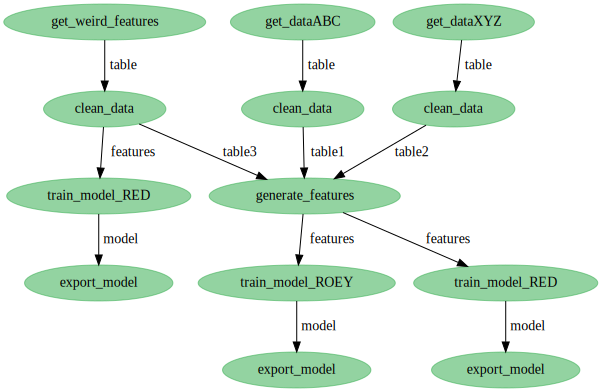

In [5]:
flow.visualize(flow_state=state)

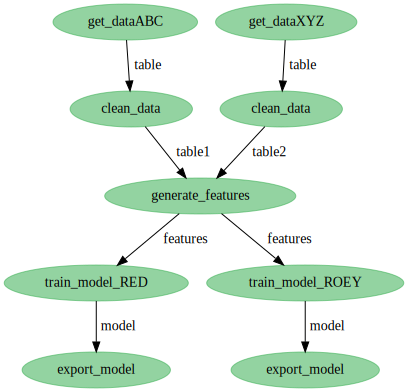

In [6]:
flow2.visualize(flow_state=state2)